In [2]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Specify the path to your JSON file
file_path = '/home/newuser/Downloads/robustness_exp/q20_result.json'
sweep_file = '/home/newuser/Downloads/robustness_exp/tpch_q20_sweep.csv'
# Open and load the JSON file
with open(file_path, 'r') as file:
    data = json.load(file)

table = pd.read_csv(sweep_file,index_col=0)



In [3]:
# Step 1: Create sorted value arrays for col1 and col2
col1_name = list(data.keys())[0]  # col1name
col2_name = list(data.keys())[1]  # col2name

# Get selectivity dictionaries for col1 and col2
col1_values = data[col1_name]
col2_values = data[col2_name]


In [4]:
deviation_log = data['deviation_log']





[(0, 1, 1.4139331784312164), (1, 85, 1.790549727064268), (2, 86, 1.3526830631637823), (3, 89, 1.1619587042727895), (4, 89, 1.2852701350855351), (5, 89, 1.2533015710800348), (6, 90, 1.1151954259054986), (7, 93, 1.6271500094210174), (8, 93, 1.4855104962125232), (9, 93, 1.6180582043509453), (10, 96, 1.2629036547727324), (11, 96, 1.3109538821082118), (12, 96, 1.3806545405368849), (13, 99, 1.1624865940484075), (14, 99, 1.1452102573241618), (15, 99, 1.1665337612240263), (16, 17, 1.0534330698373302), (17, 102, 1.1080355392957466), (18, 102, 1.087956637480355), (19, 20, 1.079987410638012), (20, 104, 1.0552079476349747), (21, 107, 1.023817504768986), (22, 107, 1.0321016932491225), (23, 24, 1.17559636900992), (24, 110, 1.2064572836327174), (25, 110, 1.1268801762878045), (26, 112, 1.1566049863413284), (27, 112, 1.1154815905392608), (28, 114, 1.412618184321648), (29, 114, 1.494537177541729), (30, 114, 1.3805796500120522), (31, 115, 1.1841271514491356), (32, 117, 1.1119960490014618), (33, 117, 1.14

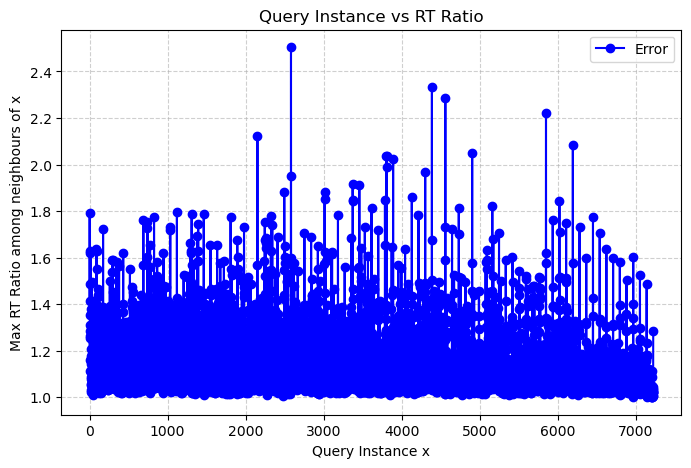

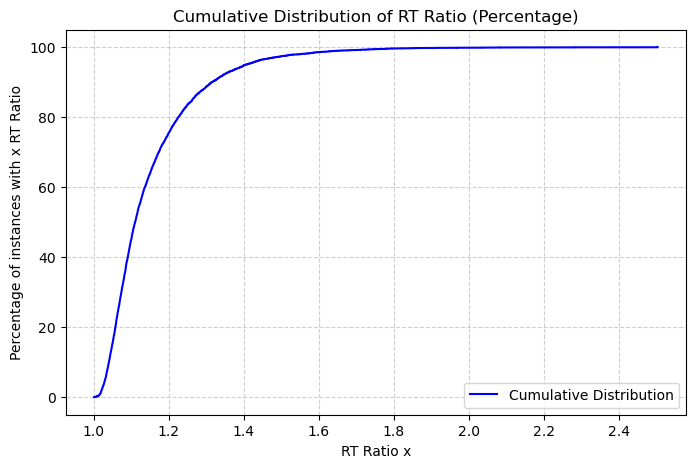

In [11]:
from collections import defaultdict
result = defaultdict(lambda: (None, float('-inf')))

# Iterate through the data to calculate maxidx and max_error
for idx1, idx2, error in deviation_log:
    current_maxidx, current_max_error = result[idx1]
    if error > current_max_error:
        result[idx1] = (idx2, error)

# Convert to a list of tuples if needed
result_list = [(idx, maxidx, max_error) for idx, (maxidx, max_error) in result.items()]

# Print the result
print(result_list)

# Extract idx and max_error for plotting
idx_values = [entry[0] for entry in result_list]
max_errors = [entry[2] for entry in result_list]

# Create the 2D plot
plt.figure(figsize=(8, 5))
plt.plot(idx_values, max_errors, marker='o', linestyle='-', color='b', label='Error')
plt.xlabel('Query Instance x')
plt.ylabel('Max RT Ratio among neighbours of x')
plt.title('Query Instance vs RT Ratio')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

# Extract the errors
errors = [entry[2] for entry in result_list]

# Sort errors to compute cumulative count
sorted_errors = np.sort(errors)
cumulative_count = np.arange(1, len(sorted_errors) + 1)

# Convert cumulative count to percentage
cumulative_percentage = (cumulative_count / len(sorted_errors)) * 100

# Create the plot
plt.figure(figsize=(8, 5))
plt.step(sorted_errors, cumulative_percentage, where="post", color="b", label="Cumulative Distribution")
plt.xlabel("RT Ratio x")
plt.ylabel("Percentage of instances with x RT Ratio")
plt.title("Cumulative Distribution of RT Ratio (Percentage)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()

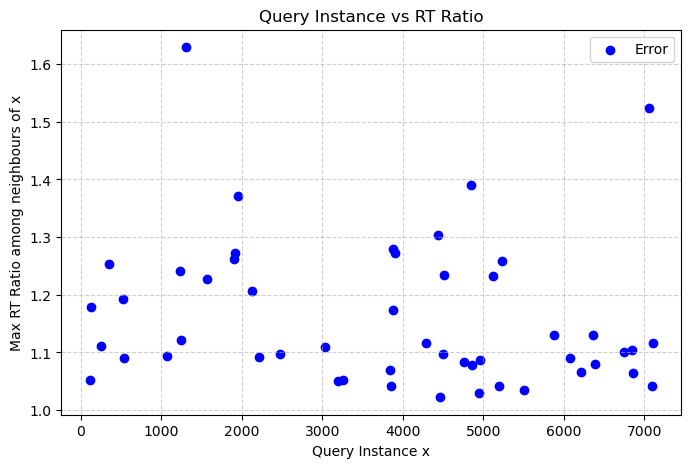

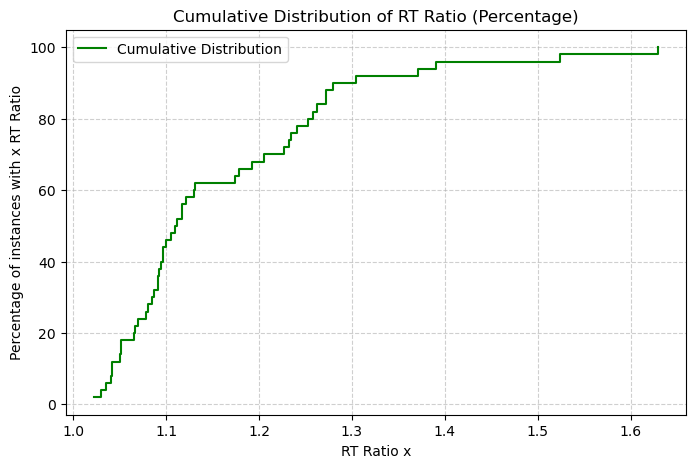

In [12]:
import random

# Randomly select 50 indices from the result list (if you have less than 50, it will select all of them)
random_indices = random.sample(result_list, min(50, len(result_list)))
random.seed(3) 
# Extract idx and errors
idx_values = [entry[0] for entry in random_indices]
errors = [entry[2] for entry in random_indices]

# 1. First 2D plot: idx vs error
plt.figure(figsize=(8, 5))
plt.scatter(idx_values, errors, marker='o', linestyle='-', color='b', label='Error')
plt.xlabel('Query Instance x')
plt.ylabel('Max RT Ratio among neighbours of x')
plt.title('Query Instance vs RT Ratio')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


# 2. Second 2D plot: Cumulative distribution of errors
# Sort the errors to compute cumulative percentage
sorted_errors = np.sort(errors)
cumulative_count = np.arange(1, len(sorted_errors) + 1)

# Convert cumulative count to percentage
cumulative_percentage = (cumulative_count / len(sorted_errors)) * 100

plt.figure(figsize=(8, 5))
plt.step(sorted_errors, cumulative_percentage, where="post", color="g", label="Cumulative Distribution")
plt.xlabel("RT Ratio x")
plt.ylabel("Percentage of instances with x RT Ratio")
plt.title("Cumulative Distribution of RT Ratio (Percentage)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()